In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
cf = pd.read_csv("C:\\Users\\abhijit.a.pande\\Machine Learning\\datasets\\CardioGoodFitness-1.csv")

In [3]:
cf.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [7]:
cf.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [8]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
from sklearn.impute import SimpleImputer

In [13]:
si = SimpleImputer(missing_values = np.NaN, strategy = "mean")

In [15]:
si.fit_transform([[100,50,np.NaN],[3,np.NaN,5],[np.NaN, 123, 345]])

array([[100. ,  50. , 175. ],
       [  3. ,  86.5,   5. ],
       [ 51.5, 123. , 345. ]])

In [16]:
cf.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [18]:
cf.pivot_table(values = "Education", index = "Product", columns = "Gender")

Gender,Female,Male
Product,,
TM195,15.100000,14.975000
TM498,15.206897,15.032258
TM798,17.857143,17.212121


<Figure size 1440x1440 with 0 Axes>

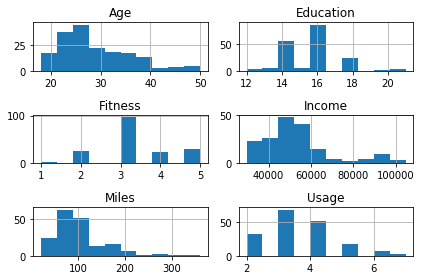

In [22]:
plt.figure(figsize=(20,20))
cf.hist()
plt.tight_layout()

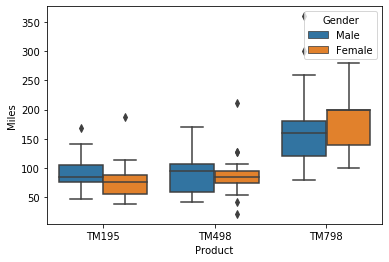

In [24]:
sb.boxplot(x = "Product", y = "Miles", data = cf, hue ="Gender")

<Figure size 2160x2160 with 0 Axes>

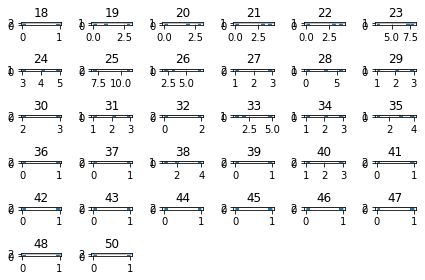

In [29]:
plt.figure(figsize=(30,30))
pd.crosstab(cf["Product"],cf["Age"]).hist()
plt.tight_layout()

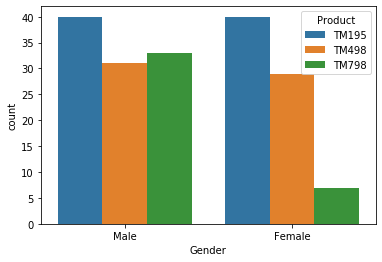

In [30]:
sb.countplot(x = cf["Gender"], hue = cf["Product"], data = cf)

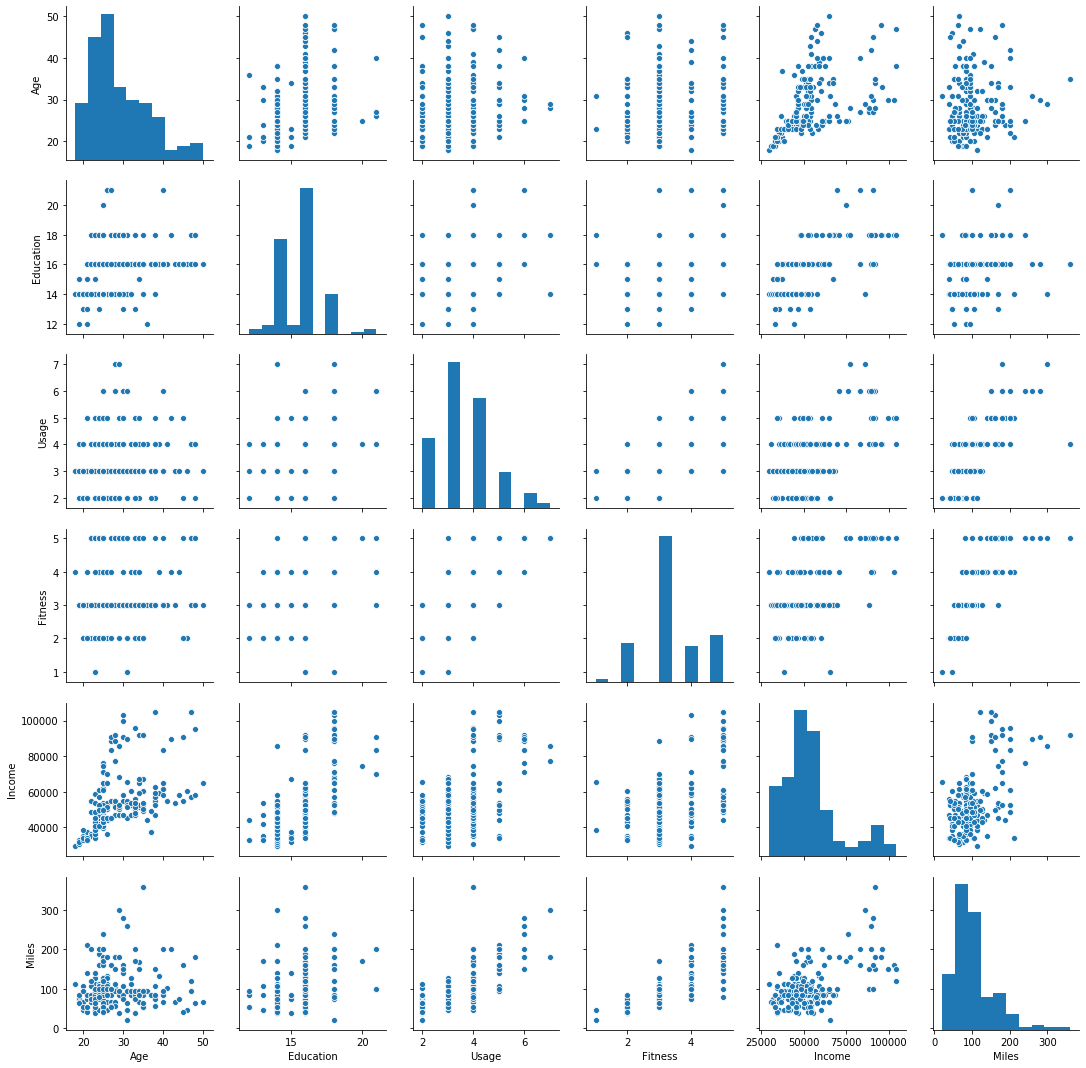

In [31]:
sb.pairplot(cf)

In [32]:
cf["Age"].std()

6.943498135399795

In [33]:
cf["Income"].mean()

53719.57777777778

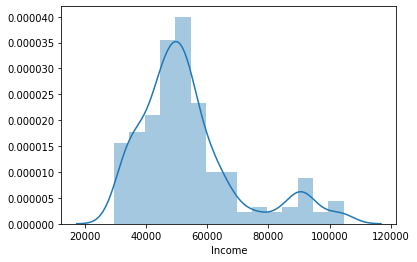

In [34]:
sb.distplot(cf["Income"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276D5D570F0>,
      dtype=object)

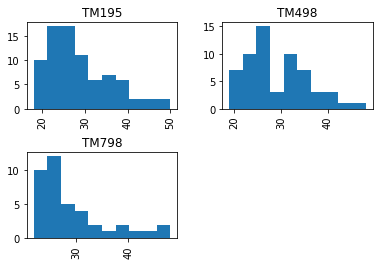

In [35]:
cf.hist("Age", by = "Product")

In [36]:
corr = cf.corr()

In [37]:
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [38]:
cov = cf.cov()

In [39]:
cov

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


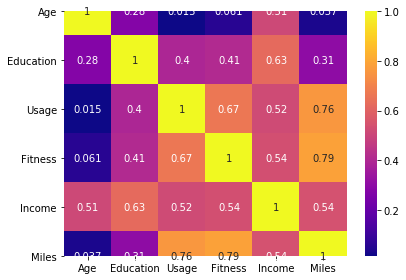

In [43]:
sb.heatmap(corr, cmap = "plasma", annot = True)
plt.tight_layout()